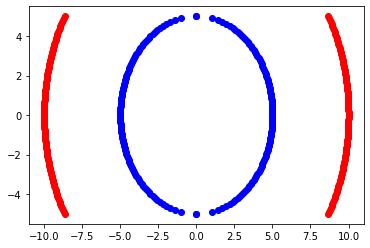

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)

y = np.hstack((y, -y))
x = np.hstack((x, x))

x_1 = np.linspace(-5.0, 5.0, 100)
y_1 = np.sqrt(5**2 - x_1**2)
y_1 = np.hstack([y_1, -y_1])
x_1 = np.hstack([x_1, x_1])

plt.figure(figsize=(10, 10))
plt.scatter(y, x, color='red', label='y = sqrt(10^2 - x^2)')
plt.scatter(y_1, x_1, color='blue', label='y = sqrt(5^2 - x^2)')

plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='red', label='y = sqrt(10^2 - x^2)')
plt.scatter(x_1, y_1, color='blue', label='y = sqrt(5^2 - x^2)')

In [ ]:
# Support Vector Machine - Optimal Margin Calssifier
import numpy as np
import cvxopt
from utils import *
from sklearn.svm import SVC

def linear_kernel(x, z):
    return np.dot(x, z.T)

def polynomial_kernel(x, z, p=5):
    return (1 + np.dot(x, z.T))**p


def guassian_kernel(x, z, sigma=.1):
    return np.exp(-np.linalg.norm(x - z, axis=1)**2 / (2 * (sigma**2)))

class SVM():
    def __init__(self, kernel=guassian_kernel, C=1):
        self.kernel = kernel
        self.C = C
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        m_samples, n_features = X.shape
        # calculate the kernel matrix
        self.K = np.zeros((m_samples, m_samples))

        for i in range(m_samples):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)
        
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m_samples, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m_samples) * -1, np.eye(m_samples))))
        h = cvxopt.matrix(np.hstack((np.zeros(m_samples), np.ones(m_samples) * self.C)))
        A = cvxopt.matrix(y, (1, m_samples), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options['show_progress'] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol['x'])

    def predict(self, X):
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_params(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                 * self.y[sv, np.newaxis]
                 * self.kernel(X[i], self.X[sv])[:, np.newaxis]
                 )
        return np.sign(y_predict + self.b)

    def get_params(self, alphas):
        threshold = 1e-4
        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv]*self.y[sv, np.newaxis])
        self.b = np.mean(self.y[sv, np.newaxis] - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis])
        return sv
        

if __name__ == '__main__':
    # np.random.seed(1)
    X, y = create_dataset(N=50)
    svm = SVM(kernel=guassian_kernel)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    print('Accuracy: %.2f' % (np.mean(y_pred == y) * 100))
    plot_contour(X, y, svm)

    # SVM with SKLearn gussian kernel
    clf = SVC(C=10, kernel='rbf', gamma=10)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print('Accuracy: %.2f' % (np.mean(y_pred == y) * 100))
    plot_contour(X, y, clf)


In [ ]:
# ToDo
# PART A: implement SVM
# test it on 'd1.csv'
# plot decision boundry including data
# Change C in range [0.1 - 1 - 10 - 100] and analyize output
# consider tolerance=0.001, max_passes=5


In [ ]:
# ToDo
# PART B: Implement Guassian Kernel
# Output shoud be approximatly as '324652.0'
# Consider x_1=[1;2;1], x_2=[0;4;-1], sigma=2.0

In [ ]:
# ToDo:
# Part C: Test algorithm on 'd2.csv'
# Plot decision boundry

In [ ]:
# ToDo:
# Part D: Test algorithm on 'd3.csv'
# Change C and sigma in range [0.001, 0.03, 0.1, 0.3, 1, 3, 10, 100]
# by considering accuracy get best parameters by tuning with validation data ('d3-validation.csv')

In [ ]:
# ToDo:
# Part E:
# plot decision boundry for train data
# plot decision boundry for validation data